# [NAPARI](https://napari.org/)
## and [cellpose](https://cellpose-napari.readthedocs.io/en/latest/index.html) (installer [here](https://pypi.org/project/cellpose-napari/0.1.3/))

To upgrade run in a cell:
```python
!pip install cellpose-napari==0.1.3
!pip install cellpose --upgrade
```

```bash
napari -w cellpose-napari
```

### Basic usage:
```python
viewer = napari.view_image(data.astronaut(), rgb=True)
nbscreenshot(viewer)
viewer.close()
```

example notebooks [here](https://github.com/sofroniewn/napari-training-course/blob/master/lessons/)

In [ ]:
## to install
# !pip install napari[all]
# !pip install QT
# !pip install napari[pyqt5]
# !pip install cellpose-napari==0.1.4
# !pip install napari-nikon-nd2
# !pip install magicgui
# !pip install napari-pyclesperanto-assistant
# !pip install napari-clusters-plotter #hdbscan failed
# !pip install napari-plot-profile
# !pip install napari-brightness-contrast
# !pip install napari-curtain
# !pip install napari-3d-ortho-viewer
# !pip install napari-manual-split-and-merge-labels
# !pip install napari-crop
# !pip install napari-stl-exporter

## to upgrade:
# !pip install cellpose-napari==0.1.4
# !pip install cellpose-napari --upgrade
# !pip install cellpose --upgrade
# !pip install napari --upgrade
# !pip install mxnet-mkl

In [101]:
import napari
import cellpose_napari
import cellpose
from cellpose import models
from napari.utils import nbscreenshot
from tifffile import imread
import numpy as np
from scipy import ndimage
from scipy.stats import mannwhitneyu
import napari_nikon_nd2
import os 
from magicgui import magicgui
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import importlib
import svgutils
from svgutils.compose import *
from plotParams import *

In [2]:
plotStyle = 'dark';
# plotStyle = 'light';

if plotStyle=='dark':
    # dark background
    params = {"ytick.color" : "w",
              "xtick.color" : "w",
              "axes.labelcolor" : "w",
              "axes.edgecolor" : "w",
             "axes.linewidth" : 3,
             "xtick.major.width" : 3,
             "ytick.major.width" : 3,
             "xtick.major.size" : 8,
             "ytick.major.size" : 8,
             "text.color" : "w"}
    plt.rcParams.update(params)
elif plotStyle=='light':
    # white background
    params = {"ytick.color" : "k",
              "xtick.color" : "k",
              "axes.labelcolor" : "k",
              "axes.edgecolor" : "k",
             "axes.linewidth" : 3,
             "xtick.major.width" : 3,
             "ytick.major.width" : 3,
             "xtick.major.size" : 8,
             "ytick.major.size" : 8,
             "text.color" : "k"}
    plt.rcParams.update(params)
font_prop = font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc')


matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=batlow)

# viewer = napari.Viewer()

print('Opened viewer; plot style is ' + plotStyle)

Opened viewer; plot style is dark


In [3]:
viewer = napari.Viewer()

[INFO] Resource 'XMLSchema.xsd' is already loaded


2022-03-20 12:09:14,201 [INFO] Resource 'XMLSchema.xsd' is already loaded


In [ ]:
viewer.close()

***
# Index <a id='Index'></a>
***
- [Extraction of z planes for analysis](#zExtract)
- [Segmentation with cellpose](#cellSeg)
- [Manual correction of segmentation](#manualCuration)
- [Create thumbnails _WIP_](#thumbnails)
- [Quantification](#quantification)

***
## Extract layers from z-stacks<a id='zExtract' name='zExtract'>∮</a>
- Missing Jan20_2022
- Started with Jan28_2022
***
[Back to Index](#Index)

In [ ]:
# getting list of files
# dPath = "/Volumes/angueyraNEI/LiImaging/zf/20220128_tbx2aF3_nr2e3F0"
dPath = "/Volumes/angueyraNEI/LiImaging/zf/20220128_tbx2aF3_nr2e3F0_immunos"
!ls $dPath/*F0*[002,004].nd2

In [ ]:
# clear viewer
viewer.layers.select_all()
viewer.layers.remove_selected()

In [ ]:
viewer.close()

In [ ]:
# clear viewer
viewer.layers.select_all()
viewer.layers.remove_selected()

# analysis directory
dAnalysis = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRtbx2aF3s_nr2e3F0/xOGs1C/"

# open file

# F3[tbx2a]
dPath = "/Volumes/angueyraNEI/LiImaging/zf/20220128_tbx2aF3_nr2e3F0/"
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L01_002'; gene = 'tbx2a'; zlims = [35,38]; # tbx2a het. Good one
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L01_004'; gene = 'tbx2a'; zlims = [34,39]; # 
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L02_002'; gene = 'tbx2a'; zlims = [35,38]; # tbx2a mut; nalou
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L02_004'; gene = 'tbx2a'; zlims = [35,38]; # nalou
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L03_002'; gene = 'tbx2a'; zlims = [31,35]; # tbx2a het
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L03_004'; gene = 'tbx2a'; zlims = [36,40]; # 
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L04_002'; gene = 'tbx2a'; zlims = [36,40]; # tbx2a wt
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L04_004'; gene = 'tbx2a'; zlims = [32,36]; #
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L05_002'; gene = 'tbx2a'; zlims = [41,44]; # tbx2a het; ONH in FOV
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L05_004'; gene = 'tbx2a'; zlims = [30,34]; # This in could be EXAMPLE for het
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L06_002'; gene = 'tbx2a'; zlims = [36,39]; # tbx2a het
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L06_004'; gene = 'tbx2a'; zlims = [30,33]; # This in could be EXAMPLE for het too
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L07_002'; gene = 'tbx2a'; zlims = [26,36]; # tbx2a het; is this one nalou???
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L07_004'; gene = 'tbx2a'; zlims = [28,32]; # Also looks like nalou?
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L08_002'; gene = 'tbx2a'; zlims = [32,36]; # tbx2a mutant; missing some UV cones
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L08_004'; gene = 'tbx2a'; zlims = [29,32]; # Also nalou
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L09_002'; gene = 'tbx2a'; zlims = [38,42]; # tbx2a het
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L09_004'; gene = 'tbx2a'; zlims = [28,32];
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L10_002'; gene = 'tbx2a'; zlims = [29,32]; # tbx2a wt
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L10_004'; gene = 'tbx2a'; zlims = [32,36];
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L11_002'; gene = 'tbx2a'; zlims = [29,36]; # tbx2a het; curved
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L11_004'; gene = 'tbx2a'; zlims = [47,52]; # curved
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L12_002'; gene = 'tbx2a'; zlims = [41,46]; # tbx2a het
# fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L12_004'; gene = 'tbx2a'; zlims = [27,34]; # ONH in FOV
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L01_002'; gene = 'nr2e3'; zlims = [30,44]; # tbx2a wt; nr2e3 cr
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L02_002'; gene = 'nr2e3'; zlims = [22,24]; # tbx2a het; nr2e3 cr; 2 rods left. Could be EXAMPLE
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L02_004'; gene = 'nr2e3'; zlims = [30,33]; # also 2 rods but more curved
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L03_002'; gene = 'nr2e3'; zlims = [29,32]; # tbx2a het; nalor
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L03_004'; gene = 'nr2e3'; zlims = [18,23];
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L04_002'; gene = 'nr2e3'; zlims = [29,40]; # bad genotyping; curved retina, not nalou and no rods in mips
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L04_004'; gene = 'nr2e3'; zlims = [38,54]; # less but still curved
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L05_002'; gene = 'nr2e3'; zlims = [33,42]; # tbx2a wt, clear nalor
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L05_004'; gene = 'nr2e3'; zlims = [27,34];
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L06_002'; gene = 'nr2e3'; zlims = [34,37]; # tbx2a wt, clear nalor (1 rod)
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L07_002'; gene = 'nr2e3'; zlims = [35,39]; # tbx2a mutant; no rods
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L08_002'; gene = 'nr2e3'; zlims = [38,46]; # tbx2a het
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L08_004'; gene = 'nr2e3'; zlims = [22,29]; # no rods; flat DAPI but dim
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L09_002'; gene = 'nr2e3'; zlims = [37,41]; # tbx2a het, nr2e3 wt!; bad DAPI; normal rods?
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L10_002'; gene = 'nr2e3'; zlims = [22,30]; # tbx2a het; clear nalor. 1 rods has very long filopodia
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L10_004'; gene = 'nr2e3'; zlims = [27,33]; # also clear nalor
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L11_002'; gene = 'nr2e3'; zlims = [33,41]; # tbx2a wt; 4 rods
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L11_004'; gene = 'nr2e3'; zlims = [22,34]; # more subtle nalor
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L12_002'; gene = 'nr2e3'; zlims = [22,25]; # tbx2a het; 2 rods, very flat, good DAPI. Could be EXAMPLE for het
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L13_002'; gene = 'nr2e3'; zlims = [29,36]; # tbx2a mutant.
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L13_004'; gene = 'nr2e3'; zlims = [28,48]; # really curved; 2 rods, 7 UV cones.
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L14_002'; gene = 'nr2e3'; zlims = [29,31]; # tbx2a mutant and nr2e3 wt: looks normal 
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L14_004'; gene = 'nr2e3'; zlims = [33,35]; # some UV cones missing?
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L15_002'; gene = 'nr2e3'; zlims = [45,48]; # tbx2a mutant: curved but found good plane (but not for DAPI)
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L15_004'; gene = 'nr2e3'; zlims = [28,33]; # also curved; not a good plane for DAPI. Clear _nalou_ and _nalor_
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L16_002'; gene = 'nr2e3'; zlims = [18,23]; # tbx2a mutant and nr2e3 wt: looks normal 
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L17_002'; gene = 'nr2e3'; zlims = [18,24]; # tbx2a mutant: extreme _nalor_ no rods in FOV
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L17_004'; gene = 'nr2e3'; zlims = [20,24]; # no rods in FOV either. 4 UV cones
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L18_002'; gene = 'nr2e3'; zlims = [27,31]; # tbx2a mutant: ok
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L18_004'; gene = 'nr2e3'; zlims = [27,32]; # flat and nice for DAPI
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L19_002'; gene = 'nr2e3'; zlims = [17,24]; # tbx2a mutant: some really dim UV cones
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L19_004'; gene = 'nr2e3'; zlims = [29,34]; # also very dim UV cones
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L21_002'; gene = 'nr2e3'; zlims = [24,29]; # tbx2a mutant
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L21_004'; gene = 'nr2e3'; zlims = [35,40];
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L22_002'; gene = 'nr2e3'; zlims = [30,44]; # tbx2a mutant and nr2e3 wt: curved but MIP worked
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L22_004'; gene = 'nr2e3'; zlims = [32,36]; # tbx2a mutant and nr2e3 wt: nalou but not nalor. good for DAPI.
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L23_002'; gene = 'nr2e3'; zlims = [30,34]; # tbx2a mutant: nalou and nalor
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L23_004'; gene = 'nr2e3'; zlims = [41,46]; # slanted view but ok to count: 1 rod 4 UV cones
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L24_002'; gene = 'nr2e3'; zlims = [21,28]; # tbx2a mutant: nalou and nalor could be EXAMPLE
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L24_004'; gene = 'nr2e3'; zlims = [27,34]; # good too
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L25_002'; gene = 'nr2e3'; zlims = [30,42]; # tbx2a mutant (but 2 extra peaks in frag analysis): nalou and nalor
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L25_004'; gene = 'nr2e3'; zlims = [35,42]; # clear nalou and nalor too
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L26_002'; gene = 'nr2e3'; zlims = [33,37]; # tbx2a het: normal UV cones and nalor
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L26_004'; gene = 'nr2e3'; zlims = [33,37];
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L27_002'; gene = 'nr2e3'; zlims = [39,45]; # tbx2a het and nr2e3 wt: normal
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L27_004'; gene = 'nr2e3'; zlims = [30,35];
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L28_002'; gene = 'nr2e3'; zlims = [26,31]; #tbx2a wt: normal UV cones and nalor
# fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L28_004'; gene = 'nr2e3'; zlims = [32,34]; # forgot DAPI channel

# analysis directory
dAnalysis = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRtbx2aF3s_nr2e3F0/s1C/"

# open file

# F3[tbx2a]
dPath = "/Volumes/angueyraNEI/LiImaging/zf/20220128_tbx2aF3_nr2e3F0_immunos/"
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L13_002'; gene = 'tbx2a'; zlims = [48,52]; # tbx2a het; flat, good DAPI
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L13_004'; gene = 'tbx2a'; zlims = [28,34]; # less flat
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L14_002'; gene = 'tbx2a'; zlims = [34,42]; # tbx2a wt
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L15_002'; gene = 'tbx2a'; zlims = [30,34]; # tbx2a mut; nalou-ish
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L15_004'; gene = 'tbx2a'; zlims = [21,32]; # not normal, but still nalou-ish
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L16_002'; gene = 'tbx2a'; zlims = [28,33]; # tbx2a wierd peaks; nalou; many dim UV cones.
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L16_004'; gene = 'tbx2a'; zlims = [43,58]; # curved but ok; nalou
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L17_002'; gene = 'tbx2a'; zlims = [42,48]; # tbx2a mut; nalou-ish
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L17_004'; gene = 'tbx2a'; zlims = [43,48]; # nalou; some gaps in Nucs (rods?)
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L18_002'; gene = 'tbx2a'; zlims = [31,36]; # tbx2a het; nice one
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L18_004'; gene = 'tbx2a'; zlims = [22,25]; # good for nucs. fraction of UV cones that are mCh-?
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L19_002'; gene = 'tbx2a'; zlims = [28,32]; # tbx2a mut; nalou
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L19_004'; gene = 'tbx2a'; zlims = [30,33]; # nalou
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L20_002'; gene = 'tbx2a'; zlims = [33,37]; # tbx2a mut nalou
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L20_004'; gene = 'tbx2a'; zlims = [28,34]; # tbx2a mut nalou
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L21_002'; gene = 'tbx2a'; zlims = [42,46]; # tbx2a mut nalou
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L21_004'; gene = 'tbx2a'; zlims = [32,38]; # tbx2a mut nalou
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L22_002'; gene = 'tbx2a'; zlims = [39,44]; # tbx2a mut nalou
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L22_004'; gene = 'tbx2a'; zlims = [44,48]; # tbx2a mut nalou
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L23_002'; gene = 'tbx2a'; zlims = [30,38]; # tbx2a mut nalou
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L23_004'; gene = 'tbx2a'; zlims = [38,42]; # tbx2a mut nalou
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L24_002'; gene = 'tbx2a'; zlims = [41,44]; # tbx2a mut nalou
# #### fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L24_004'; gene = 'tbx2a'; #side-view
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L25_002'; gene = 'tbx2a'; zlims = [34,37]; # tbx2a het; immuno channels have no information. Good for DAPI and counting mCherry- UV cones 
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L25_004'; gene = 'tbx2a'; zlims = [24,27]; # tbx2a het; nice DAPI
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L26_002'; gene = 'tbx2a'; zlims = [22,25]; # tbx2a mut nalou
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L26_004'; gene = 'tbx2a'; zlims = [31,39]; # tbx2a mut nalou; curved, gash and ONH. Exclude?
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L27_002'; gene = 'tbx2a'; zlims = [15,19]; # nalou but bad tbx2a genotyping
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L27_004'; gene = 'tbx2a'; zlims = [23,28]; # nalou but bad tbx2a genotyping
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L28_002'; gene = 'tbx2a'; zlims = [42,48]; # tbx2a mut nalou
# fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L28_004'; gene = 'tbx2a'; zlims = [35,39]; # tbx2a mut nalou

# fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L29_002'; gene = 'nr2e3'; zlims = [36,39]; # tbx2a wt; nr2e3 CR
# fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L29_004'; gene = 'nr2e3'; zlims = [24,27]; # tbx2a wt; nr2e3 CR
# fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L30_002'; gene = 'nr2e3'; zlims = [29,32]; # tbx2a het; nr2e3 CR
# fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L30_004'; gene = 'nr2e3'; zlims = [21,29]; # tbx2a het; nr2e3 CR; very curved
# fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L31_002'; gene = 'nr2e3'; zlims = [36,39]; # tbx2a het; nr2e3 CR; GFP+ -> 2 rods!!!
# fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L31_004'; gene = 'nr2e3'; zlims = [34,38]; # tbx2a het; nr2e3 CR; GFP+ -> no rods!
# fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L32_002'; gene = 'nr2e3'; zlims = [30,33]; # tbx2a mut; nr2e3 CR; nalou++ -> EXAMPLE
# fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L32_004'; gene = 'nr2e3'; zlims = [29,30]; # tbx2a mut; nr2e3 CR; nalou++ -> EXAMPLE too
# fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L33_002'; gene = 'nr2e3'; zlims = [25,28]; # tbx2a mut; nr2e3 CR; nalou++ -> EXAMPLE
# fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L33_004'; gene = 'nr2e3'; zlims = [24,26]; # tbx2a mut; nr2e3 CR; nalou++
# fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L34_002'; gene = 'nr2e3'; zlims = [19,23]; # tbx2a mut; nr2e3 CR; nalou++
# fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L34_004'; gene = 'nr2e3'; zlims = [19,23]; # tbx2a mut; nr2e3 CR; nalou++

# create subdirectory for analysis
dOut = dAnalysis + gene + '/' + fPath + '/'
if (os.path.isdir(dOut)==False):
    os.mkdir(dOut)
    print('Created output directory')

print('Canvas clear')

In [ ]:
# load whole stack to figure out best planes for cellpose
print('Loading files...')
viewer.open((dPath+fPath + ".nd2"))
viewer.layers.remove(viewer.layers[len(viewer.layers)-1]) # remove transmitted detector image
viewer.layers.select_next();

# if len(viewer.layers)==2: # no DAPI, GFP and RFP
#     nChannels = 2
#     viewer.layers[0].colormap = 'green'
#     viewer.layers[0].name = 'R'
#     viewer.layers[1].colormap = 'magenta'
#     viewer.layers[1].name = 'U'
if len(viewer.layers)==2: # DAPI and RFP channel (single positive larvae with bad immunos)
    nChannels = 2
    viewer.layers[0].colormap = 'gray'
    viewer.layers[0].name = 'N'
    viewer.layers[0].opacity = 0.66
    viewer.layers[1].colormap = 'magenta'
    viewer.layers[1].name = 'U'
elif len(viewer.layers)==3: #DAPI
    nChannels = 3
    viewer.layers[0].colormap = 'gray'
    viewer.layers[0].name = 'N'
    viewer.layers[0].opacity = 0.33
    viewer.layers[1].colormap = 'green'
    viewer.layers[1].name = 'R'
    viewer.layers[2].colormap = 'magenta'
    viewer.layers[2].name = 'U'
elif len(viewer.layers)==4: #DAPI and immunos
    nChannels = 4
    viewer.layers[0].colormap = 'gray'
    viewer.layers[0].name = 'N'
    viewer.layers[0].opacity = 0.33
    viewer.layers[1].colormap = 'green'
    viewer.layers[1].name = 'rho'
    viewer.layers[2].colormap = 'magenta'
    viewer.layers[2].name = 'U'
    viewer.layers[3].colormap = 'bop orange'
    viewer.layers[3].name = 'sws1'

print('Loaded: ' + fPath)

In [ ]:
# make mips (and remove any previous ones)
# # code fr eyes without immuno
zlims = [19,23];
if len(viewer.layers)>nChannels:
    for l in viewer.layers[nChannels:]:
        viewer.layers.remove(l)

# for l in [viewer.layers[0],viewer.layers[1],viewer.layers[2],viewer.layers[3]]: # save all channels including immunos
# for l in [viewer.layers[0],viewer.layers[1],viewer.layers[2]]: # DAPI and FP channels
for l in [viewer.layers['N'],viewer.layers['U']]: #DAPI and RFP
# for l in [viewer.layers['N'],viewer.layers['U'],viewer.layers['R']]: #DAPI and RFP and GPF
    l.visible = False
#     viewer.layers.remove(l.name + '_mip')
    viewer.add_image(l.data[zlims[0]:zlims[1]].max(axis=0), blending='additive', colormap = l.colormap, name = l.name + "_mip")
    
    
# # for FPs ------- # for OSs # code for eyes with 1D4 immuno
# zlims = [28,30]; zlims2 = [14,18];
# if len(viewer.layers)>3:
#     for l in viewer.layers[3:]:
#         viewer.layers.remove(l)

# for l in [viewer.layers[0],viewer.layers[1]]:
#     l.visible = False
# #     viewer.layers.remove(l.name + '_mip')
#     viewer.add_image(l.data[zlims[0]:zlims[1]].max(axis=0), blending='additive', colormap = l.colormap, name = l.name + "_mip")
    
# for l in [viewer.layers[2]]:
#     l.visible = False
# #     viewer.layers.remove(l.name + '_mip')
#     viewer.add_image(l.data[zlims2[0]:zlims2[1]].max(axis=0), blending='additive', colormap = l.colormap, name = l.name + "_mip")

In [ ]:
# when things look good, save in folder for batch cellpose analysis
# l = viewer.layers['R_mip']; l.save(dOut + l.name + '.tiff')
l = viewer.layers['U_mip']; l.save(dOut + l.name + '.tiff')
l = viewer.layers['N_mip']; l.save(dOut + l.name + '.tiff')
print('MIP layers saved for ' + fPath)
# l = viewer.layers['LWS_mip']; l.save(dOut + l.name + '.tiff')

### [Go back and run next one &uarr;](#zExtract)
---

***
## Segmentation using cellpose<a id='cellSeg'>∮</a>
***
[Back to Index](#Index)

## Run cellpose in napari GUI and identify good parameters.
Usually for:
1. xOPS:GFP: diameter = 20; flow_threshold = 0.4 and mask_threshold = 0.0
1. sws1:mCherry: diameter = 40; flow_threshold = 0.4 and mask_threshold = 0.0
1. sws2:mCherry:
1. mws2:GFP:
1. thrb:tdTomato:
    

In [ ]:
# clear viewer
viewer.layers.select_all()
viewer.layers.remove_selected()

# analysis directory
dAnalysis = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRtbx2aF3s_nr2e3F0/xOGs1C/"

# open file

# F3[tbx2b]
dPath = "/Volumes/angueyraNEI/LiImaging/zf/20220107_tbx2bF3s_xOG_s1C/"
fPath = 'xxxxxx'; gene = 'wt'; zlims = [58,61];

# redefine analysis subdirectory
dOut = dAnalysis + gene + '/' + fPath + '/'
print('Viewer cleared...')

# load mips
viewer.open(dOut + 'R' + "_mip.tiff", plugin='builtins', colormap = 'green', blending='additive');
viewer.open(dOut + 'U' + "_mip.tiff", plugin='builtins', colormap = 'magenta', blending='additive');
viewer.open(dOut + 'N' + "_mip.tiff", plugin='builtins', colormap = 'gray', opacity= 0.33, blending='additive');

print('Loaded mips')

## Cellpose: batch analysis
#### Define parameters and files

In [ ]:
# clear viewer
viewer.layers.select_all()
viewer.layers.remove_selected()

In [ ]:
# define analysis directory
dAnalysis = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRtbx2aF3s_nr2e3F0/xOGs1C/"

# collect file paths

# gene = 'tbx2a'
# fPaths = [
#     '20220128_tbx2aF3_uninj_xOG_s1C_L01_002',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L01_004',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L02_002',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L02_004',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L03_002',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L03_004',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L04_002',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L04_004',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L05_002',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L05_004',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L06_002',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L06_004',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L07_002',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L07_004',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L08_002',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L08_004',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L09_002',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L09_004',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L10_002',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L10_004',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L11_002',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L11_004',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L12_002',
#     '20220128_tbx2aF3_uninj_xOG_s1C_L12_004',
#          ]
    
# gene = 'nr2e3'
# fPaths = [
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L01_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L02_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L02_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L03_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L03_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L04_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L04_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L05_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L05_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L06_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L07_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L08_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L08_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L09_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L10_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L10_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L11_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L11_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L12_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L13_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L13_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L14_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L14_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L15_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L15_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L16_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L17_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L17_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L18_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L18_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L19_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L19_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L21_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L21_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L22_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L22_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L23_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L23_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L24_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L24_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L25_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L25_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L26_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L26_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L27_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L27_004',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L28_002',
#     '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L28_004',
#          ]


# define analysis directory
dAnalysis = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRtbx2aF3s_nr2e3F0/s1C/"

# collect file paths

# gene = 'tbx2a'
# fPaths = [
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L13_002',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L13_004',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L14_002',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L15_002',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L15_004',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L16_002',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L16_004',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L17_002',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L17_004',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L18_002',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L18_004',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L19_002',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L19_004',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L20_002',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L20_004',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L21_002',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L21_004',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L22_002',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L22_004',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L23_002', 
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L23_004',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L24_002',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L25_002',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L25_004',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L26_002',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L26_004',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L27_002',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L27_004',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L28_002',
#     '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L28_004',
# ]

gene = 'nr2e3'
fPaths = [
#     '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L29_002',
#     '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L29_004',
#     '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L30_002',
#     '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L30_004',
#     '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L31_002',
#     '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L31_004',
#     '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L32_002',
#     '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L32_004',
#     '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L33_002',
#     '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L33_004',
#     '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L34_002',
#     '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L34_004',
]

# define cellpose params
cpParams = {
    'model' : 'cyto2', # default is 'cyto' or 'cyto2'
    'net_avg' : True,
    'channels' : [0,0], #single channel without nucleus info
    'diameterR' : 20,
    'diameterU' : 40,
    'flow_threshold' : 0.4,
    'mask_threshold' : 0.0
}

# define model to use (e.g. 'cyto2')
model = models.Cellpose(gpu=False, model_type=cpParams['model'])

In [ ]:
print('Starting analysis:\n')
for fPath in fPaths:
    print('\n' + fPath)
    print('\t Rods')
    dOut = dAnalysis + gene + '/' + fPath + '/' + 'R_mip.tiff'
    img = cellpose.io.imread(dOut)
#     imgplot = plt.imshow(img)
    masks, flows, styles, diams = model.eval(img, 
                                             diameter=cpParams['diameterR'], channels=cpParams['channels'],
                                             do_3D=False, net_avg = cpParams['net_avg'], interp = True,
                                             flow_threshold = cpParams['flow_threshold'], mask_threshold = cpParams['mask_threshold'])
    cellpose.io.masks_flows_to_seg(img, masks, flows, diams, dOut, cpParams['channels']) # save results
    
#     print('\t UV cones')
#     dOut = dAnalysis + gene + '/' + fPath + '/' + 'U_mip.tiff'
#     img = cellpose.io.imread(dOut)
# #     imgplot = plt.imshow(img)
#     masks, flows, styles, diams = model.eval(img, 
#                                              diameter=cpParams['diameterU'], channels=cpParams['channels'],
#                                              do_3D=False, net_avg = cpParams['net_avg'], interp = True,
#                                              flow_threshold = cpParams['flow_threshold'], mask_threshold = cpParams['mask_threshold'])
#     cellpose.io.masks_flows_to_seg(img, masks, flows, diams, dOut, cpParams['channels']) # save results
    
print('\nFinished cellpose batch analysis')

***
## Manual correction of cellpose segmentation<a id='manualCuration'>∮</a>
***
[Back to Index](#Index)

In [ ]:
# viewer = napari.Viewer()

In [ ]:
# clear viewer
viewer.layers.select_all()
viewer.layers.remove_selected()
# for l in viewer.layers:
#         viewer.layers.remove(l)

# analysis directory
dAnalysis = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRtbx2aF3s_nr2e3F0/xOGs1C/"

### Double transgenic larvae
# open file

# F3[tbx2a]
dPath = "/Volumes/angueyraNEI/LiImaging/zf/20220128_tbx2aF3_nr2e3F0/"
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L01_002'; gene = 'tbx2a'; # tbx2a het. Good one
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L01_004'; gene = 'tbx2a'; # 
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L02_002'; gene = 'tbx2a'; # tbx2a mut; nalou
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L02_004'; gene = 'tbx2a'; # nalou
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L03_002'; gene = 'tbx2a'; # tbx2a het
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L03_004'; gene = 'tbx2a'; # 
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L04_002'; gene = 'tbx2a'; # tbx2a wt
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L04_004'; gene = 'tbx2a'; #
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L05_002'; gene = 'tbx2a'; # tbx2a het; ONH in FOV
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L05_004'; gene = 'tbx2a'; # This in could be EXAMPLE for het
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L06_002'; gene = 'tbx2a'; # tbx2a het
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L06_004'; gene = 'tbx2a'; # This in could be EXAMPLE for het too
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L07_002'; gene = 'tbx2a'; # tbx2a het; is this one nalou???
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L07_004'; gene = 'tbx2a'; # Also looks like nalou?
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L08_002'; gene = 'tbx2a'; # tbx2a mutant; missing some UV cones
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L08_004'; gene = 'tbx2a'; # Also nalou
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L09_002'; gene = 'tbx2a'; # tbx2a het
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L09_004'; gene = 'tbx2a';
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L10_002'; gene = 'tbx2a'; # tbx2a wt
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L10_004'; gene = 'tbx2a';
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L11_002'; gene = 'tbx2a'; # tbx2a het; curved
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L11_004'; gene = 'tbx2a'; # curved
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L12_002'; gene = 'tbx2a'; # tbx2a het
fPath = '20220128_tbx2aF3_uninj_xOG_s1C_L12_004'; gene = 'tbx2a'; # ONH in FOV

fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L01_002'; gene = 'nr2e3'; # tbx2a wt; nr2e3 cr
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L02_002'; gene = 'nr2e3'; # tbx2a het; nr2e3 cr; 2 rods left. Could be EXAMPLE
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L02_004'; gene = 'nr2e3'; # also 2 rods but more curved
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L03_002'; gene = 'nr2e3'; # tbx2a het; nalor
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L03_004'; gene = 'nr2e3';
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L04_002'; gene = 'nr2e3'; # bad genotyping; curved retina, not nalou and no rods in mips
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L04_004'; gene = 'nr2e3'; # less but still curved
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L05_002'; gene = 'nr2e3'; # tbx2a wt, clear nalor
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L05_004'; gene = 'nr2e3';
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L06_002'; gene = 'nr2e3'; # tbx2a wt, clear nalor (1 rod)
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L07_002'; gene = 'nr2e3'; # tbx2a mutant; no rods
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L08_002'; gene = 'nr2e3'; # tbx2a het
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L08_004'; gene = 'nr2e3'; # no rods; flat DAPI but dim
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L09_002'; gene = 'nr2e3'; # tbx2a het, nr2e3 wt!; bad DAPI; normal rods?
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L10_002'; gene = 'nr2e3'; # tbx2a het; clear nalor. 1 rods has very long filopodia
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L10_004'; gene = 'nr2e3'; # also clear nalor
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L11_002'; gene = 'nr2e3'; # tbx2a wt; 4 rods
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L11_004'; gene = 'nr2e3'; # more subtle nalor
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L12_002'; gene = 'nr2e3'; # tbx2a het; 2 rods, very flat, good DAPI. Could be EXAMPLE for het
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L13_002'; gene = 'nr2e3'; # tbx2a mutant.
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L13_004'; gene = 'nr2e3'; # really curved; 2 rods, 7 UV cones.
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L14_002'; gene = 'nr2e3'; # tbx2a mutant and nr2e3 wt: looks normal 
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L14_004'; gene = 'nr2e3'; # some UV cones missing?
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L15_002'; gene = 'nr2e3'; # tbx2a mutant: curved but found good plane (but not for DAPI)
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L15_004'; gene = 'nr2e3'; # also curved; not a good plane for DAPI. Clear _nalou_ and _nalor_
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L16_002'; gene = 'nr2e3'; # tbx2a mutant and nr2e3 wt: looks normal 
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L17_002'; gene = 'nr2e3'; # tbx2a mutant: extreme _nalor_ no rods in FOV
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L17_004'; gene = 'nr2e3'; # no rods in FOV either. 4 UV cones
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L18_002'; gene = 'nr2e3'; # tbx2a mutant: ok
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L18_004'; gene = 'nr2e3'; # flat and nice for DAPI
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L19_002'; gene = 'nr2e3'; # tbx2a mutant: some really dim UV cones
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L19_004'; gene = 'nr2e3'; # also very dim UV cones
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L21_002'; gene = 'nr2e3'; # tbx2a mutant
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L21_004'; gene = 'nr2e3';
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L22_002'; gene = 'nr2e3'; # tbx2a mutant and nr2e3 wt: curved but MIP worked
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L22_004'; gene = 'nr2e3'; # tbx2a mutant and nr2e3 wt: nalou but not nalor. good for DAPI.
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L23_002'; gene = 'nr2e3'; # tbx2a mutant: nalou and nalor
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L23_004'; gene = 'nr2e3'; # slanted view but ok to count: 1 rod 4 UV cones
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L24_002'; gene = 'nr2e3'; # tbx2a mutant: nalou and nalor could be EXAMPLE
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L24_004'; gene = 'nr2e3'; # good too
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L25_002'; gene = 'nr2e3'; # tbx2a mutant (but 2 extra peaks in frag analysis): nalou and nalor
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L25_004'; gene = 'nr2e3'; # clear nalou and nalor too
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L26_002'; gene = 'nr2e3'; # tbx2a het: normal UV cones and nalor
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L26_004'; gene = 'nr2e3';
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L27_002'; gene = 'nr2e3'; # tbx2a het and nr2e3 wt: normal
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L27_004'; gene = 'nr2e3';
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L28_002'; gene = 'nr2e3'; #tbx2a wt: normal UV cones and nalor
fPath = '20220128_tbx2aF3_nr2e3F0_xOG_s1C_L28_004'; gene = 'nr2e3'; # forgot DAPI channel

# define subdirectory for analysis
dOut = dAnalysis + gene + '/' + fPath + '/'
print('Viewer cleared...')

# clear key binds
@viewer.bind_key('k', overwrite=True)
def toggle_sel(viewer):
    ...
@viewer.bind_key('b', overwrite=True)
def toggle_sel(viewer):
    ...
@viewer.bind_key('Shift-x', overwrite=True)
def removeLabel(viewer):
    ...

# load mips
mipO = 0.65
viewer.open(dOut + 'R' + "_mip.tiff", plugin='builtins', colormap = 'gray', blending='additive', opacity=mipO);
viewer.open(dOut + 'U' + "_mip.tiff", plugin='builtins', colormap = 'magenta', blending='additive', opacity=mipO);
viewer.open(dOut + 'N' + "_mip.tiff", plugin='builtins', colormap = 'bop blue', blending='additive', opacity=mipO);

# load segmentation
segData = np.load(dOut + 'R' + "_mip" + "_seg.npy", allow_pickle=True).item()
viewer.add_labels(segData['masks'], name='R_seg',blending='additive');
viewer.layers['R_seg'].preserve_labels = True;

segData = np.load(dOut + 'U' + "_mip" + "_seg.npy", allow_pickle=True).item()
viewer.add_labels(segData['masks'], name='U_seg',blending='additive');
viewer.layers['U_seg'].visible = False
viewer.layers['U_seg'].preserve_labels = True;


viewer.layers['N_mip'].visible = False;
# viewer.layers['R_seg'].contour = 5
# viewer.layers['U_seg'].contour = 5

print('Loaded  ' + fPath + ' !\n Now fix it and save it!')

#define useful keyboard shortcuts

@viewer.bind_key('Shift-x', overwrite=True)
def removeLabel(viewer):
    lname = 'R_seg'
    tempd = viewer.layers[lname].data
    tempd[tempd == viewer.layers[lname].selected_label]=0
    viewer.layers[lname].data = tempd
    print('Cut!')

print('removeLabel on R_seg ("Shift-X")')

@viewer.bind_key('k', overwrite=True)
def toggle_sel(viewer):
    lname = 'R_seg'
    if (viewer.layers[lname].preserve_labels == True):
        viewer.layers[lname].preserve_labels = False
    elif (viewer.layers[lname].preserve_labels == False):
        viewer.layers[lname].preserve_labels = True
print('toggle R_seg preserve_labels ("k")')
        
@viewer.bind_key('b', overwrite=True)
def toggle_sel(viewer):
    lname = 'U_mip'
    if (viewer.layers[lname].visible == True):
        viewer.layers[lname].visible = False
    elif (viewer.layers[lname].visible == False):
        viewer.layers[lname].visible = True
print('toggle U_mip visibility ("B")')

@viewer.bind_key('n', overwrite=True)
def toggle_sel(viewer):
    lname = 'R_mip'
    if (viewer.layers[lname].visible == True):
        viewer.layers[lname].visible = False
    elif (viewer.layers[lname].visible == False):
        viewer.layers[lname].visible = True
print('toggle R_mip visibility ("N")')

@viewer.bind_key('+', overwrite=True)
def new_label(viewer):
    """Set the currently selected label to the largest used label plus one."""
    lname = 'R_seg'
    viewer.layers[lname].selected_label = viewer.layers[lname].data.max() + 1
print('Add new label in R_seg visibility ("+"|"M")')

In [93]:
# clear viewer
viewer.layers.select_all()
viewer.layers.remove_selected()


### Only UV cones larvae

# analysis directory
dAnalysis = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRtbx2aF3s_nr2e3F0/s1C/"

# open file

# F3[tbx2a]
# dPath = "/Volumes/angueyraNEI/LiImaging/zf/20220128_tbx2aF3_nr2e3F0_immunos/"
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L13_002'; gene = 'tbx2a'; # tbx2a het; flat, good DAPI
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L13_004'; gene = 'tbx2a'; # less flat
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L14_002'; gene = 'tbx2a'; # tbx2a wt
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L15_002'; gene = 'tbx2a'; # tbx2a mut; nalou-ish
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L15_004'; gene = 'tbx2a'; # not normal, but still nalou-ish
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L16_002'; gene = 'tbx2a'; # tbx2a wierd peaks; nalou; many dim UV cones.
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L16_004'; gene = 'tbx2a'; # curved but ok; nalou
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L17_002'; gene = 'tbx2a'; # tbx2a mut; nalou-ish
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L17_004'; gene = 'tbx2a'; # nalou; some gaps in Nucs (rods?)
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L18_002'; gene = 'tbx2a'; # tbx2a het; nice one
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L18_004'; gene = 'tbx2a'; # good for nucs. fraction of UV cones that are mCh-?
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L19_002'; gene = 'tbx2a'; # tbx2a mut; nalou
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L19_004'; gene = 'tbx2a'; # nalou
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L20_002'; gene = 'tbx2a'; # tbx2a mut nalou
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L20_004'; gene = 'tbx2a'; # tbx2a mut nalou
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L21_002'; gene = 'tbx2a'; # tbx2a mut nalou
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L21_004'; gene = 'tbx2a'; # tbx2a mut nalou
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L22_002'; gene = 'tbx2a'; # tbx2a mut but not nalou?
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L22_004'; gene = 'tbx2a'; # tbx2a mut but not nalou?
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L23_002'; gene = 'tbx2a'; # tbx2a mut nalou
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L23_004'; gene = 'tbx2a'; # tbx2a mut nalou
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L24_002'; gene = 'tbx2a'; # tbx2a mut nalou
# #### fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L24_004'; gene = 'tbx2a'; #side-view
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L25_002'; gene = 'tbx2a'; # tbx2a het; immuno channels have no information. Good for DAPI and counting mCherry- UV cones 
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L25_004'; gene = 'tbx2a'; # tbx2a het; nice DAPI
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L26_002'; gene = 'tbx2a'; # tbx2a mut nalou
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L26_004'; gene = 'tbx2a'; # tbx2a mut nalou; curved, gash and ONH. Exclude?
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L27_002'; gene = 'tbx2a'; # nalou but bad tbx2a genotyping
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L27_004'; gene = 'tbx2a'; # nalou but bad tbx2a genotyping
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L28_002'; gene = 'tbx2a'; # tbx2a mut nalou
fPath = '20220128_tbx2aF3_uninj_s1C_rho488_sws1_rCy5_L28_004'; gene = 'tbx2a'; # tbx2a mut nalou

fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L29_002'; gene = 'nr2e3'; # tbx2a wt; nr2e3 CR
fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L29_004'; gene = 'nr2e3'; # tbx2a wt; nr2e3 CR
fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L30_002'; gene = 'nr2e3'; # tbx2a het; nr2e3 CR
fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L30_004'; gene = 'nr2e3'; # tbx2a het; nr2e3 CR; very curved
fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L31_002'; gene = 'nr2e3'; # THIS ONE IS DONE FOR BOTH CHANNELS tbx2a het; nr2e3 CR; GFP+ -> 2 rods!!!
fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L31_004'; gene = 'nr2e3'; # tbx2a het; nr2e3 CR; GFP+ -> no rods!
fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L32_002'; gene = 'nr2e3'; # tbx2a mut; nr2e3 CR; nalou++ -> EXAMPLE
fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L32_004'; gene = 'nr2e3'; # tbx2a mut; nr2e3 CR; nalou++ -> EXAMPLE too
fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L33_002'; gene = 'nr2e3'; # tbx2a mut; nr2e3 CR; nalou++ -> EXAMPLE
fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L33_004'; gene = 'nr2e3'; # tbx2a mut; nr2e3 CR; nalou++
fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L34_002'; gene = 'nr2e3'; # tbx2a mut; nr2e3 CR; nalou++
fPath = '20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L34_004'; gene = 'nr2e3'; # tbx2a mut; nr2e3 CR; nalou++


# define subdirectory for analysis
dOut = dAnalysis + gene + '/' + fPath + '/'
print('Viewer cleared...')

# clear key binds
@viewer.bind_key('k', overwrite=True)
def toggle_sel(viewer):
    ...
@viewer.bind_key('b', overwrite=True)
def toggle_sel(viewer):
    ...
@viewer.bind_key('Shift-x', overwrite=True)
def removeLabel(viewer):
    ...

# load mips
mipO = 0.65
viewer.open(dOut + 'U' + "_mip.tiff", plugin='builtins', colormap = 'magenta', blending='additive', opacity=mipO);
viewer.open(dOut + 'N' + "_mip.tiff", plugin='builtins', colormap = 'bop blue', blending='additive', opacity=mipO/3);

# load segmentation

segData = np.load(dOut + 'U' + "_mip" + "_seg.npy", allow_pickle=True).item()
viewer.add_labels(segData['masks'], name='U_seg',blending='additive');
viewer.layers['U_seg'].visible = True
viewer.layers['U_seg'].preserve_labels = True;


# viewer.layers['N_mip'].visible = False;
# viewer.layers['R_seg'].contour = 5
# viewer.layers['U_seg'].contour = 5

print('Loaded  ' + fPath + ' !\n Now fix it and save it!')

### define useful keyboard shortcuts

@viewer.bind_key('Shift-x', overwrite=True)
def removeLabel(viewer):
    lname = 'U_seg'
    tempd = viewer.layers[lname].data
    tempd[tempd == viewer.layers[lname].selected_label]=0
    viewer.layers[lname].data = tempd
    print('Cut!')
print('removeLabel on U_seg ("Shift-X")')

@viewer.bind_key('k', overwrite=True)
def toggle_sel(viewer):
    lname = 'U_seg'
    if (viewer.layers[lname].preserve_labels == True):
        viewer.layers[lname].preserve_labels = False
    elif (viewer.layers[lname].preserve_labels == False):
        viewer.layers[lname].preserve_labels = True
print('toggle U_seg preserve_labels ("k")')

@viewer.bind_key('b', overwrite=True)
def toggle_sel(viewer):
    lname = 'N_mip'
    if (viewer.layers[lname].visible == True):
        viewer.layers[lname].visible = False
    elif (viewer.layers[lname].visible == False):
        viewer.layers[lname].visible = True
print('toggle N_mip visibility ("B")')

        
@viewer.bind_key('n', overwrite=True)
def toggle_sel(viewer):
    lname = 'U_mip'
    if (viewer.layers[lname].visible == True):
        viewer.layers[lname].visible = False
    elif (viewer.layers[lname].visible == False):
        viewer.layers[lname].visible = True
print('toggle U_mip visibility ("N")')

@viewer.bind_key('+', overwrite=True)
def new_label(viewer):
    """Set the currently selected label to the largest used label plus one."""
    lname = 'U_seg'
    viewer.layers[lname].selected_label = viewer.layers[lname].data.max() + 1
print('Add new label in U_seg visibility ("+"|"M")')

Viewer cleared...
Loaded  20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L34_004 !
 Now fix it and save it!
removeLabel on U_seg ("Shift-X")
toggle U_seg preserve_labels ("k")
toggle N_mip visibility ("B")
toggle U_mip visibility ("N")
Add new label in U_seg visibility ("+"|"M")


---

#### resave curated segmentation after napari-ing around

In [94]:
# # Save second channel segmentation
baseName = 'U'
lname = baseName + '_seg'
l = viewer.layers[baseName + '_seg']; l.save(dOut + l.name + '_curated.tiff')
print('Done with ' + lname + ' for ' + fPath)

# If NUCS mip revealed UV cones
baseName = 'U'
lname = baseName + '_missing'
l = viewer.layers['Points']; l.save(dOut + baseName + '_missing');

Done with U_seg for 20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L34_004


#### resave curated segmentation after napari-ing around (only doing R_mip)

In [95]:
# # Only doing 1 channel segmentation
# baseName = 'R'
# lname = baseName + '_seg'
# l = viewer.layers[baseName + '_seg']; l.save(dOut + l.name + '_curated.tiff')
# print('Done with ' + lname + ' for ' + fPath)

# # Doing 2 channel segmentation
# baseName = 'R'
# lname = baseName + '_seg'
# l = viewer.layers[baseName + '_seg']; l.save(dOut + l.name + '_curated.tiff')
# print('Done with ' + lname + ' for ' + fPath)
# viewer.layers['U_mip'].visible = True
# viewer.layers['U_seg'].visible = True
# viewer.layers['U_seg'].contour = 0
# viewer.layers['R_mip'].visible = False
# viewer.layers['R_seg'].visible = False

# # viewer.layers['N_mip'].visible = True

# @viewer.bind_key('Shift-x', overwrite=True)
# def removeLabel(viewer):
#     lname = 'U_seg'
#     tempd = viewer.layers[lname].data
#     tempd[tempd == viewer.layers[lname].selected_label]=0
#     viewer.layers[lname].data = tempd
#     print('Cut!')
# print('removeLabel on U_seg ("Shift-X")')

# @viewer.bind_key('k', overwrite=True)
# def toggle_sel(viewer):
#     lname = 'U_seg'
#     if (viewer.layers[lname].preserve_labels == True):
#         viewer.layers[lname].preserve_labels = False
#     elif (viewer.layers[lname].preserve_labels == False):
#         viewer.layers[lname].preserve_labels = True
# print('toggle U_seg preserve_labels ("k")')

# @viewer.bind_key('b', overwrite=True)
# def toggle_sel(viewer):
#     lname = 'R_mip'
#     if (viewer.layers[lname].visible == True):
#         viewer.layers[lname].visible = False
#     elif (viewer.layers[lname].visible == False):
#         viewer.layers[lname].visible = True
# print('toggle R_mip visibility ("B")')

        
# @viewer.bind_key('n', overwrite=True)
# def toggle_sel(viewer):
#     lname = 'U_mip'
#     if (viewer.layers[lname].visible == True):
#         viewer.layers[lname].visible = False
#     elif (viewer.layers[lname].visible == False):
#         viewer.layers[lname].visible = True
# print('toggle L_mip visibility ("N")')

# @viewer.bind_key('+', overwrite=True)
# def new_label(viewer):
#     """Set the currently selected label to the largest used label plus one."""
#     lname = 'U_seg'
#     viewer.layers[lname].selected_label = viewer.layers[lname].data.max() + 1
# print('Add new label in R_seg visibility ("+"|"M")')

### Reload curated segmentations after saving

In [96]:
# remove all except mips
n_mips = 2;
if len(viewer.layers)>n_mips:
    for l in viewer.layers[n_mips:]:
        viewer.layers.remove(l)

# viewer.open(dOut + 'R' + "_seg_curated.tiff", name='R_seg', plugin='builtins');
# viewer.layers['R_seg'].contour = 5
# viewer.layers['R_mip'].visible = True
viewer.open(dOut + 'U' + "_seg_curated.tiff", name='U_seg', plugin='builtins');

print(fPath)
# nR = len(np.unique(viewer.layers['R_seg'].data))-1
# print("Image has {0} Rods".format(nR))
nU = len(np.unique(viewer.layers['U_seg'].data))-1
print("Image has {0} UV cones".format(nU))

20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_L34_004
Image has 12 UV cones


In [97]:
# remove all layers
if len(viewer.layers)>0:
    for l in viewer.layers[0:]:
        viewer.layers.remove(l)

### [Go back and run next one &uarr;](#manualCuration)

---

### [Go back and run next one &uarr;](#manualCuration)
---

In [ ]:
# # manual merging of labels
# mergeLabels = [167,168]
# # lname = 'M_seg'
# lname = 'L_seg'
# if viewer.layers[lname].visible == False:
#     print('Layer not active')
# else:
#     tempd = viewer.layers[lname].data
#     tempd[tempd == mergeLabels[1]]=mergeLabels[0]
#     viewer.layers[lname].data = tempd
#     print('Merged in ' + lname)

In [ ]:
# # manually delete label
# selLabel = 49
# lname = 'L_seg'
# tempd = viewer.layers[lname].data
# tempd[tempd == selLabel]=0
# viewer.layers[lname].data = tempd

# for selLabel in np.arange(7,100):
#     lname = 'U_seg'
#     tempd = viewer.layers[lname].data
#     tempd[tempd == selLabel]=0
#     viewer.layers[lname].data = tempd

***
## To Do: Batch export of png with mips and contours of curated segmentation<a id='thumbnails'>∮</a>
***
[Back to Index](#Index)

This could do the trick:
```python
def blended_img(viewer):
    import napari
    import numpy as np
    
    blended = np.zeros(viewer.layers[0].data.shape + (4,))
    for layer in viewer.layers:
        # normalize data by clims
        normalized_data = (layer.data - layer.contrast_limits[0]) / (
        layer.contrast_limits[1] - layer.contrast_limits[0]
    )
        colormapped_data = layer.colormap.map(normalized_data.flatten())
        colormapped_data = colormapped_data.reshape(normalized_data.shape + (4,))

        blended = blended + colormapped_data
    
    blended[..., 3] = 1 # set alpha channel to 1

    return blended
```

***
## Quantification<a id='quantification'></a>
***
[Back to Index](#Index)

### Read csv created during analysis and create bar plot

In [106]:
#gene Colors
zfC = {
    'R'  : '#7d7d7d',
    'U' : '#B73AB9',
    'S' : '#4364F6',
    'M' : '#59CB3B',
    'L' : '#CE2A22',
}

zfG = {
    'wt' : '#000000',
    'tbx2a' : '#ab266b',
    'tbx2b' : '#421f8e',
    'foxq2' : '#001dd6',
}

zfGm = {
    'wt' : 'o',
    'tbx2a' : 'P',
    'tbx2b' : 'X',
    'foxq2' : '^',
}

prLabel = {
    'R'  : 'Rods',
    'U' : 'UV',
    'S' : 'S',
    'M' : 'M',
    'L' : 'L',
}


def formatFigureMain(figH, axH, plotH):
#     font_path = 'C:/Users/pataklk/Documents/Frag_Analysis_Code/Avenir.ttc'
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=30) # was 18
    fontLabels = font_manager.FontProperties(fname=font_path, size=36) # was 22
    fontTitle = font_manager.FontProperties(fname=font_path, size=30) # was 28 
    axH.set_xscale('linear')
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    
    for label in (axH.get_xticklabels() + axH.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    axH.set_xlabel(axH.get_xlabel(), fontproperties = fontTicks)
    axH.set_ylabel(axH.get_ylabel(), fontproperties = fontTicks)
    return fontLabels

def formatFigure(figH, axH, plotH):
    fontLabels = formatFigureMain(figH, axH, plotH)
#     axH.set_xlabel('wt vs. cr', fontproperties=fontLabels)
    axH.set_ylabel('cells per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.xaxis.set_tick_params(rotation=45)

def formatFigureRvU(figH, axH, plotH):
    fontLabels = formatFigureMain(figH, axH, plotH)
    axH.set_xlabel('Rods per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.set_ylabel('UV cones per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.xaxis.set_tick_params(rotation=45)
    
def formatFigureMvS(figH, axH, plotH):
    fontLabels = formatFigureMain(figH, axH, plotH)
    axH.set_xlabel('M cones per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.set_ylabel('S cones per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.xaxis.set_tick_params(rotation=45)

    
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import colorsys
    try:
        c = matplotlib.colors.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*matplotlib.colors.to_rgb(c))
    return matplotlib.colors.rgb2hex(colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2]))

def estimateJitter(dataArray):
    """ creates random jitter scaled by local density of points"""
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(dataArray)
    density = kde(dataArray)
    jitter = np.random.randn(len(dataArray))*density
    return jitter

In [107]:
pBG = 'Dark'
if pBG=='Dark':
    # dark background
    plt.style.use('dark_background')
    params = {"ytick.color" : "w", "xtick.color" : "w",
              "axes.labelcolor" : "w", "axes.edgecolor" : "w",
             "axes.linewidth" : 3,
             "xtick.major.width" : 3, "ytick.major.width" : 3,
             "xtick.major.size" : 8, "ytick.major.size" : 8,
             "text.color" : "w"}
    plt.rcParams.update(params)
    baseColor = '#ffffff' #white
else:
    # white background
    plt.style.use('default')
    params = {"ytick.color" : "k", "xtick.color" : "k",
              "axes.labelcolor" : "k", "axes.edgecolor" : "k",
             "axes.linewidth" : 3,
             "xtick.major.width" : 3, "ytick.major.width" : 3,
             "xtick.major.size" : 8, "ytick.major.size" : 8,
             "text.color" : "k"}
    plt.rcParams.update(params)
    baseColor = '#000000' #black

In [102]:
# Created csv manually during analysis
dPath = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRtbx2aF3s_nr2e3F0/"
fName = "tbx2aF3nr2e3F0_counts.csv"

df = pd.read_csv(dPath + fName)
df

,filename,R,U,S,M,L,tbx2a,nr2e3,analysisFlag,genotypingFlag,excludeFlag,notes
0,20220128_tbx2aF3_uninj_xOG_s1C_L01_002,36.0,144,NaN,NaN,NaN,++,wt,111,1,0,ok
1,20220128_tbx2aF3_uninj_xOG_s1C_L01_004,41.0,151,NaN,NaN,NaN,++,wt,111,1,0,ok
2,20220128_tbx2aF3_uninj_xOG_s1C_L02_002,17.0,66,NaN,NaN,NaN,--,wt,111,1,0,not lor
3,20220128_tbx2aF3_uninj_xOG_s1C_L02_004,35.0,60,NaN,NaN,NaN,--,wt,111,1,0,not lor
4,20220128_tbx2aF3_uninj_xOG_s1C_L03_002,41.0,126,NaN,NaN,NaN,+-,wt,111,1,0,ok
...,...,...,...,...,...,...,...,...,...,...,...,...
109,20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_...,NaN,14,NaN,NaN,NaN,--,cr,111,1,0,nalou++ EXAMPLE
110,20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_...,NaN,7,NaN,NaN,NaN,--,cr,111,1,0,nalou++ EXAMPLE
111,20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_...,NaN,16,NaN,NaN,NaN,--,cr,111,1,0,nalou++ EXAMPLE
112,20220128_tbx2bF3_nr2e3F0_s1C_rho488_sws1_rCy5_...,NaN,5,NaN,NaN,NaN,--,cr,111,1,0,nalou++ EXAMPLE


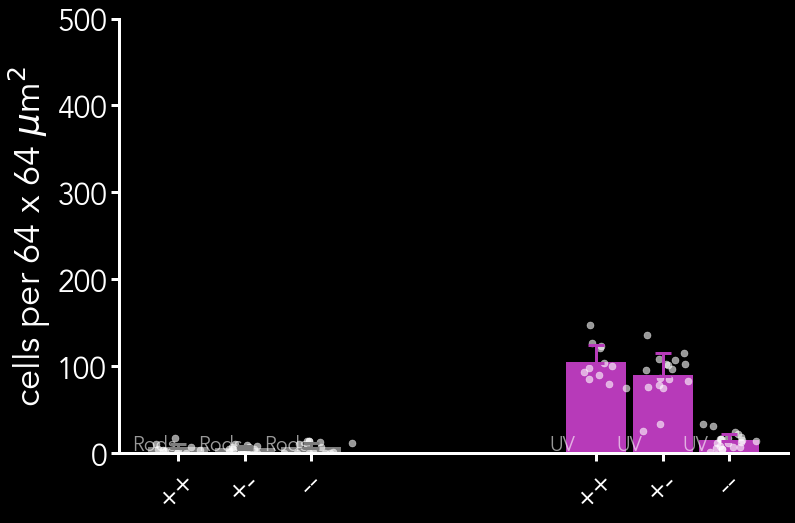

In [111]:
geneListA = ['++','+-','--']
geneListB = ['wt','cr']
nGenes = np.size(geneListA) * np.size(geneListB)
# photoreceptors = ['R','U','S','M','L']
photoreceptors = ['R','U']

plotname = ''
fH, axH = plt.subplots(figsize= [12,8])

barW = nGenes+2; # bar width
barD = nGenes+1; # bar distance whitin 1 photoreceptor subtype
barP = -nGenes+1; # position in x-axis
barStep = 0.9; # distance between photoreceptor groups
barPos = []; #array to save bar positions


j=barP;
for gene in geneListA:
    i=0;
    j=j+1;
    for pr in photoreceptors:
        i = i+barStep;
        countData = df[(df['tbx2a']==gene) & (df['nr2e3']=='cr')][pr]
        jitter = np.random.randn(len(countData))*0.03
#         textindent = 1/(2.5*barD);
        textindent = 0.10;
        pH = plt.bar([i+j/barD], np.mean(countData), width=1/barW, color=lighten_color(zfC[pr],1), linewidth = 2, edgecolor = lighten_color(zfC[pr],1)); #color=zfC[pr], 
#         pH = plt.bar([i+j/barD], np.mean(countData), yerr = sem(df[(df['CRgene']==gene) & (df['Genotype']==geno)][pr][~np.isnan(df[(df['CRgene']==gene) & (df['Genotype']==geno)][pr])], ddof = 0), align='center', ecolor='black', capsize=10, width=1/barW, color=zfC[pr], edgecolor = zfC[pr]);
#         pH = plt.bar([i+j/barD], np.mean(countData), yerr = np.std(df[(df['CRgene']==gene) & (df['Genotype']==geno)][pr][~np.isnan(df[(df['CRgene']==gene) & (df['Genotype']==geno)][pr])], ddof = 0), align='center', ecolor='black', capsize=10, width=1/barW, color=zfC[pr], edgecolor = zfC[pr]);
       # pH = plt.bar([i+j/barD], np.mean(df[(df['CRgene']==gene) & (df['Genotype']==geno)][pr]), yerr = np.std(df[(df['CRgene']==gene) & (df['Genotype']==geno)][pr]), ecolor=lighten_color(zfC[pr],1.2), capsize=10, width=1/barW, color=zfC[pr], edgecolor = zfC[pr]);
        #pH = plt.errorbar([i+j/barD], np.mean(df[(df['CRgene']==gene) & (df['Genotype']==geno)][pr]), yerr = np.std(df[(df['CRgene']==gene) & (df['Genotype']==geno)][pr]), ecolor=lighten_color(zfC[pr],1.1), elinewidth=2, capsize=5, capthick=2, barsabove= True)
#         pH = plt.scatter(np.ones(len(countData))*[i+j/barD]+jitter, countData, color=lighten_color(zfC[pr],2/3), zorder=2, marker = zfGm[gene], edgecolor='#ffffff', linewidth=0.5, alpha = 0.4);
        pH = plt.errorbar(i+j/barD, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=lighten_color(zfC[pr],1), elinewidth=3, capsize=8, capthick=3, zorder=9)
        plt.text((i+j/barD)-textindent, 3, prLabel[pr], font_properties=font_prop, fontsize=20, ha='left', alpha=0.6)
        pH = plt.scatter(np.ones(len(countData))*[i+j/barD]+jitter, countData, color='#ffffff', zorder=8, marker = 'o', s=50, edgecolor='#ffffff', linewidth=0.5, alpha = .6);
        barPos = np.append(barPos,(i+j/barD))

formatFigure(fH, axH, pH)
axH.set_xticks(np.sort(barPos));

axH.set_xticklabels(geneListA * len(photoreceptors));
axH.set_ylim([0,500]); # this was 400

# savePath = 'C:/Users/pataklk/OneDrive - National Institutes of Health/zf/F0_Analysis/CRfoxq2F0/'
# savePath = "/Users/angueyraaristjm/OneDrive - National Institutes of Health/zf/F0_Analysis/CRfoxq2F0/"
# savePath = "/Users/angueyraaristjm/Documents/LiLab/Presentations/revealjs/resources/20211008_UCLA/"
# plt.savefig(savePath + "Counts_foxq2.png", transparent=True, format="png")
# plt.savefig(savePath + "Counts_foxq2_B.svg", transparent=True, format="svg")